In [6]:
import pandas as pd
pd.set_option('display.max_rows', None)  
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
import numpy as np

In [3]:
# Importation
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [4]:
# Unique df with all the variables
df = pd.merge(X_train, y_train)

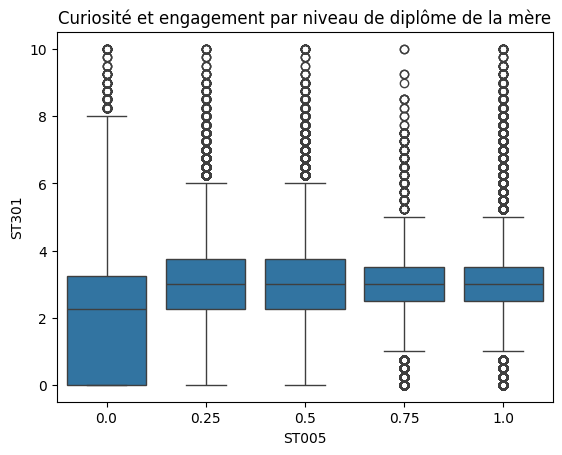

In [ ]:
# Curiosity and engagement according to the degree of the mother

# Correlation
df_ST005_ST301 = df.copy()
df_ST005_ST301 = df_ST005_ST301.dropna(subset=['ST005', 'ST301'])
df_ST005_ST301['ST005'].corr(df_ST005_ST301['ST301'], method='spearman') 

# Plot
sns.boxplot(x='ST005', y='ST301', data=df_ST005_ST301)
plt.title("Curiosity and engagement according to the degree of the mother")
plt.show()


In [ ]:
df["ST005"].

In [ ]:
# Correlation with curiosity and engagement
df_num = df.select_dtypes(include=['int64', 'float64'])
corr_target = df_num.corr()['ST301'].sort_values(ascending=False)

ST301                       1.000000
ST305                       0.682628
ST267                       0.435480
ST343                       0.424315
ST311                       0.419354
                              ...   
science_q15_total_timing         NaN
science_q16_total_timing         NaN
science_q17_total_timing         NaN
science_q18_total_timing         NaN
science_q19_total_timing         NaN
Name: ST301, Length: 300, dtype: float64


In [136]:
print(corr_target)

ST301                        1.000000
ST305                        0.682628
ST267                        0.435480
ST343                        0.424315
ST311                        0.419354
ST275                        0.389138
ST345                        0.384858
ST290                        0.377367
ST034                        0.350680
ST336                        0.333959
ST340                        0.311174
ST354                        0.298388
ST270                        0.292693
ST342                        0.283821
ST351                        0.272511
ST348                        0.271802
ST355                        0.261747
ST296                        0.250126
ST331                        0.248037
ST353                        0.221976
ST268                        0.218628
ST349                        0.207530
ST352                        0.193673
ST283                        0.191066
ST289                        0.188962
ST322                        0.184647
ST226       

In [5]:
# Correlations with disturbation
df_num = df.select_dtypes(include=['int64', 'float64'])
corr_target2 = df_num.corr()['ST322'].sort_values(ascending=False)

In [6]:
print(corr_target2)

ST322                        1.000000
ST311                        0.385672
ST343                        0.384276
ST345                        0.371829
ST268                        0.334450
ST336                        0.316545
ST342                        0.309457
ST340                        0.301129
ST289                        0.297625
ADMINMODE                    0.276195
ST283                        0.268351
ST253                        0.209330
reading_q10_total_timing     0.204197
ST331                        0.186280
ST301                        0.184647
ST250                        0.167709
ST330                        0.166769
ST005                        0.165628
ST007                        0.164117
IC176                        0.163863
ST256                        0.162508
IC180                        0.162292
IC183                        0.160692
ST270                        0.159402
ST349                        0.158165
Option_CT                    0.157524
ST254       

AttributeError: Rectangle.set() got an unexpected keyword argument 'bin'

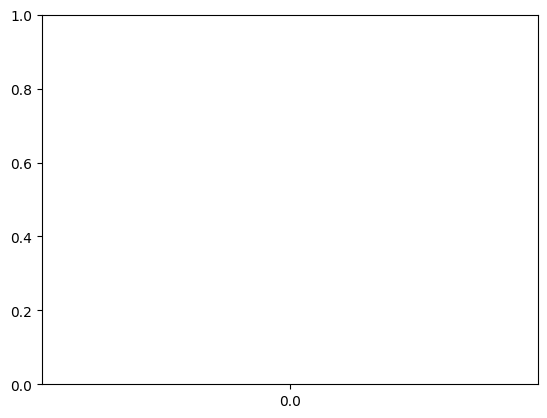

In [ ]:
# Curiosity and engagement according to the income

# Correlation
df_PA042_ST301 = df.copy()
df_PA042_ST301 = df_PA042_ST301.dropna(subset=['PA042', 'ST301'])
df_PA042_ST301['PA042'].corr(df_PA042_ST301['ST301'], method='spearman') 

# Plot
sns.barplot(x='PA042', y='ST301', data=df_PA042_ST301)
plt.title("Curiosity and engagement according to the income")
plt.show()

In [ ]:
### Regression on ST301

# New df without NAs for ST301

df_clean = df.dropna(subset=['ST301'])

# ST301 apart

X = df_clean.drop(columns=['ST301'])
y = df_clean['ST301']

# Split

X_train_val, X_test, y_train_val, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
X_train_val, y_train_val, test_size=0.25, random_state=42
)  # 0.25 * 0.8 = 0.2

In [ ]:
# Type of the columns

cat_columns = X_train.select_dtypes(include='object').columns.tolist()
num_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pipelines

num_transformer = Pipeline([
('imputer', SimpleImputer(strategy='mean')),
('scaler', StandardScaler())
])

cat_transformer = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
('num', num_transformer, num_columns),
('cat', cat_transformer, cat_columns)
])

In [ ]:
# The regression

# Use fewer trees and all cores for speed

model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)

# Pipeline

pipeline = Pipeline([
('preprocessor', preprocessor),
('regressor', model)
])

In [ ]:
# Fit on the data

pipeline.fit(X_train, y_train)

# Perf

val_score = pipeline.score(X_val, y_val)
test_score = pipeline.score(X_test, y_test)
print("Validation R^2:", val_score)
print("Test R^2:", test_score)

/opt/python/lib/python3.13/site-packages/sklearn/impute/_base.py:653: UserWarning: Skipping features without any observed values: ['ST307' 'ST160' 'ST168' 'ST161' 'ST153' 'ST188' 'PA009' 'PA182' 'PA004'
 'ST059' 'ST150' 'PA158' 'WB155' 'WB162' 'ST127' 'EC162' 'ST104' 'PA003'
 'ST125' 'ST163' 'ST297' 'ST006' 'ST263' 'PA162' 'ST164' 'ST008' 'ST152'
 'EC031' 'WB177' 'ST183' 'EC012' 'ST223' 'ST177' 'ST102' 'PA041' 'EC163'
 'PA008' 'PA177' 'ST175' 'ST273' 'EC153' 'ST212' 'PA154' 'PA156' 'PA007'
 'PA159' 'ST300' 'ST036' 'PA018' 'ST208' 'ST165' 'PA175' 'ST167' 'ST211'
 'WB176' 'ST158' 'WB178' 'IC014' 'ST213' 'ST327' 'ST251' 'ST260' 'PA160'
 'ST095' 'PA033' 'ST146' 'ST098' 'ST100' 'ST097' 'ST113' 'PA002' 'PA032'
 'IC001' 'ST008.1' 'ST006.1' 'PA008.1' 'ST011' 'reading_q11_average_score'
 'reading_q12_average_score' 'reading_q13_average_score'
 'reading_q14_average_score' 'reading_q15_average_score'
 'math_q17_average_score' 'math_q18_average_score'
 'math_q19_average_score' 'math_q20_average_sc

Validation R^2: 0.7013885243107707
Test R^2: 0.7018119799296396


In [ ]:
# We select top features with SelectFromModel ---

# Transform training data through preprocessor

X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)

# Use SelectFromModel to get top 20 features

sfm = SelectFromModel(estimator=model, max_features=20)
sfm.fit(X_train_transformed, y_train)

# Get feature names after preprocessing

feature_names = num_columns + cat_columns
top_features = [f for f, s in zip(feature_names, sfm.get_support()) if s]

print("Top 20 features selected:")
print(top_features)

/opt/python/lib/python3.13/site-packages/sklearn/impute/_base.py:653: UserWarning: Skipping features without any observed values: ['ST307' 'ST160' 'ST168' 'ST161' 'ST153' 'ST188' 'PA009' 'PA182' 'PA004'
 'ST059' 'ST150' 'PA158' 'WB155' 'WB162' 'ST127' 'EC162' 'ST104' 'PA003'
 'ST125' 'ST163' 'ST297' 'ST006' 'ST263' 'PA162' 'ST164' 'ST008' 'ST152'
 'EC031' 'WB177' 'ST183' 'EC012' 'ST223' 'ST177' 'ST102' 'PA041' 'EC163'
 'PA008' 'PA177' 'ST175' 'ST273' 'EC153' 'ST212' 'PA154' 'PA156' 'PA007'
 'PA159' 'ST300' 'ST036' 'PA018' 'ST208' 'ST165' 'PA175' 'ST167' 'ST211'
 'WB176' 'ST158' 'WB178' 'IC014' 'ST213' 'ST327' 'ST251' 'ST260' 'PA160'
 'ST095' 'PA033' 'ST146' 'ST098' 'ST100' 'ST097' 'ST113' 'PA002' 'PA032'
 'IC001' 'ST008.1' 'ST006.1' 'PA008.1' 'ST011' 'reading_q11_average_score'
 'reading_q12_average_score' 'reading_q13_average_score'
 'reading_q14_average_score' 'reading_q15_average_score'
 'math_q17_average_score' 'math_q18_average_score'
 'math_q19_average_score' 'math_q20_average_sc

Top 20 features selected:
['ADMINMODE', 'ST311', 'ST305', 'ST267', 'ST268', 'ST340', 'ST345', 'ST322', 'ST343']


In [10]:
# 1. Drop rows with missing target

df_clean2 = df.dropna(subset=['ST322'])

# 2. Separate features and target

X2 = df_clean2.drop(columns=['ST322'])
y2 = df_clean2['ST322']

# 3. Split data

X_train_val2, X_test2, y_train_val2, y_test2 = train_test_split(
X2, y2, test_size=0.2, random_state=42
)
X_train2, X_val2, y_train2, y_val2 = train_test_split(
X_train_val2, y_train_val2, test_size=0.25, random_state=42
)  # 0.25*0.8=0.2

# 4. Identify numeric and categorical columns

num_columns2 = X_train2.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns2 = X_train2.select_dtypes(include='object').columns.tolist()

# 5. Drop highly correlated numeric columns (>0.99 correlation)

corr_matrix2 = X_train2[num_columns2].corr().abs()
upper2 = corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(bool))
to_drop2 = [col for col in upper2.columns if any(upper2[col] > 0.99)]
num_columns_reduced2 = [col for col in num_columns2 if col not in to_drop2]

print(f"Dropping {len(to_drop2)} highly correlated columns.")

# 6. Preprocessing pipelines

num_transformer2 = Pipeline([
('imputer', SimpleImputer(strategy='mean')),
('scaler', StandardScaler())
])

cat_transformer2 = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor2 = ColumnTransformer([
('num', num_transformer2, num_columns_reduced2),
('cat', cat_transformer2, cat_columns2)
])

# 7. Regression pipeline

pipeline2 = Pipeline([
('preprocessor', preprocessor2),
('regressor', LinearRegression())
])

# 8. Fit pipeline

pipeline2.fit(X_train2, y_train2)

# 9. Evaluate

val_score2 = pipeline2.score(X_val2, y_val2)
test_score2 = pipeline2.score(X_test2, y_test2)
print("Validation R^2:", val_score2)
print("Test R^2:", test_score2)

# 10. Feature selection using SelectFromModel

X_train_transformed2 = pipeline2.named_steps['preprocessor'].transform(X_train2)
regressor2 = pipeline2.named_steps['regressor']

sfm2 = SelectFromModel(estimator=regressor2, max_features=20)
sfm2.fit(X_train_transformed2, y_train2)

# 11. Get feature names

feature_names2 = num_columns_reduced2 + cat_columns2
top_features2 = [f for f, s in zip(feature_names2, sfm2.get_support()) if s]

print("Top 20 features selected:")
print(top_features2)


Dropping 33 highly correlated columns.


/opt/python/lib/python3.13/site-packages/sklearn/impute/_base.py:653: UserWarning: Skipping features without any observed values: ['ST307' 'ST160' 'ST168' 'ST161' 'ST153' 'ST188' 'PA009' 'PA182' 'PA004'
 'ST059' 'ST150' 'PA158' 'WB155' 'WB162' 'ST127' 'EC162' 'ST104' 'PA003'
 'ST125' 'ST163' 'ST297' 'ST006' 'ST263' 'PA162' 'ST164' 'ST008' 'ST152'
 'EC031' 'WB177' 'ST183' 'EC012' 'ST223' 'ST177' 'ST102' 'PA041' 'EC163'
 'PA008' 'PA177' 'ST175' 'ST273' 'EC153' 'ST212' 'PA154' 'PA156' 'PA007'
 'PA159' 'ST300' 'ST036' 'PA018' 'ST208' 'ST165' 'PA175' 'ST167' 'ST211'
 'WB176' 'ST158' 'WB178' 'IC014' 'ST213' 'ST327' 'ST251' 'ST260' 'PA160'
 'ST095' 'PA033' 'ST146' 'ST098' 'ST100' 'ST097' 'ST113' 'PA002' 'PA032'
 'IC001' 'ST008.1' 'ST006.1' 'PA008.1' 'ST011' 'reading_q11_average_score'
 'reading_q12_average_score' 'reading_q13_average_score'
 'reading_q14_average_score' 'reading_q15_average_score'
 'math_q17_average_score' 'math_q18_average_score'
 'math_q19_average_score' 'math_q20_average_sc

Validation R^2: 0.25095457895198214
Test R^2: 0.25358382210190544


/opt/python/lib/python3.13/site-packages/sklearn/impute/_base.py:653: UserWarning: Skipping features without any observed values: ['ST307' 'ST160' 'ST168' 'ST161' 'ST153' 'ST188' 'PA009' 'PA182' 'PA004'
 'ST059' 'ST150' 'PA158' 'WB155' 'WB162' 'ST127' 'EC162' 'ST104' 'PA003'
 'ST125' 'ST163' 'ST297' 'ST006' 'ST263' 'PA162' 'ST164' 'ST008' 'ST152'
 'EC031' 'WB177' 'ST183' 'EC012' 'ST223' 'ST177' 'ST102' 'PA041' 'EC163'
 'PA008' 'PA177' 'ST175' 'ST273' 'EC153' 'ST212' 'PA154' 'PA156' 'PA007'
 'PA159' 'ST300' 'ST036' 'PA018' 'ST208' 'ST165' 'PA175' 'ST167' 'ST211'
 'WB176' 'ST158' 'WB178' 'IC014' 'ST213' 'ST327' 'ST251' 'ST260' 'PA160'
 'ST095' 'PA033' 'ST146' 'ST098' 'ST100' 'ST097' 'ST113' 'PA002' 'PA032'
 'IC001' 'ST008.1' 'ST006.1' 'PA008.1' 'ST011' 'reading_q11_average_score'
 'reading_q12_average_score' 'reading_q13_average_score'
 'reading_q14_average_score' 'reading_q15_average_score'
 'math_q17_average_score' 'math_q18_average_score'
 'math_q19_average_score' 'math_q20_average_sc

Top 20 features selected:
['ADMINMODE', 'LANGTEST_QQQ', 'LANGTEST_COG', 'Option_FL', 'Option_WBQ', 'ST001D01T', 'ST003D02T', 'ST003D03T', 'ST004D01T', 'AGE', 'COBN_S', 'ST253', 'ST311', 'ST038', 'ST283', 'ST267', 'ST296', 'ST301', 'ST345', 'ST343']
